# Цель лабораторной работы

Изучение различных методов визуализация данных и создание истории на основе данных.

# Задание

* Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.

Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

* Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
   1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
   2.На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
   3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
   4. Выбор графиков должен быть обоснован использованием методологии [data-to-viz](https://www.data-to-viz.com/). Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
   5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

* Сформировать отчет и разместить его в своем репозитории на github.

# Ход выполнения работы

## Текстовое описание набора данных

В качестве набора данных используется dataset [Top Games on Google Play Store](https://www.kaggle.com/datasets/dhruvildave/top-play-store-games).
Этот dataset содержит данные об играх в [Google Play](https://play.google.com). Для каждой категории приведено 100 лучших игр. Данные включают цену, рейтинги, количество установок и т.д.

Этот набор данных состоит из одного файла c 1730 записями. Данный файл содержит следующие колонки:
* `rank` — рейтинг игры в категории
* `title` — название игры
* `total ratings` — количество оценок, которые поставили пользователи
* `installs` — примерное количество установок игры
* `average rating` — средняя оценка по пятибальной шкале
* `growth (30 days)` — процент роста за 30 дней
* `growth (60 days)` — процент роста за 60 дней
* `price` — цена игры (в долларах)
* `category` — категория игры
* `5 star ratings` — количество оценок 5
* `4 star ratings` — количество оценок 4
* `3 star ratings` — количество оценок 3
* `2 star ratings` — количество оценок 2
* `1 star ratings` — количество оценок 1
* `paid` — платное приложение? (`True` у приложений с `price` > 0)

## Подключение библиотек

Подключим все необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Основные характеристики набора данных

Подключаем Dataset:

In [2]:
data = pd.read_csv('android-games.csv', sep=",")

Размер набора данных

In [3]:
data.shape

(1730, 15)

Выведем первые и последние строки

In [4]:
data

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


Как видно, в столбце `installs` содержится числовой признак, но он определяется как категориальный из-за лишней буквы `M` и пробела перед ней. Исправим это и приведём мпризнак к числовому.

In [5]:
df = data

In [6]:
df['installs'] = data['installs'].str.slice(0, -2)
df['installs'] = df['installs'].astype(float)

Выведем данные и типы колонок

In [7]:
df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


In [8]:
df.dtypes

rank                  int64
title                object
total ratings         int64
installs            float64
average rating        int64
growth (30 days)    float64
growth (60 days)    float64
price               float64
category             object
5 star ratings        int64
4 star ratings        int64
3 star ratings        int64
2 star ratings        int64
1 star ratings        int64
paid                   bool
dtype: object

Как видим, все типы данных соответствуют ожидаемым. Проверим наличие null.

In [9]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

## Обоснование графиков

Данный набор содержит 15 признаков (2 категориальных и 15 числовых).<br>
Один из категориальных признаков группирует приложения, второй - уникальный (его можно отбросить)<br>
Поэтому, для визуализации будем использовать графики из категории `A NUM IS ORDERED`.

Настройка отображения графиков

In [10]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4

## Шаг 1: Категории

Выведем список уникальных категорий

In [13]:
category_list = df['category']
set(category_list)

{'GAME ACTION',
 'GAME ADVENTURE',
 'GAME ARCADE',
 'GAME BOARD',
 'GAME CARD',
 'GAME CASINO',
 'GAME CASUAL',
 'GAME EDUCATIONAL',
 'GAME MUSIC',
 'GAME PUZZLE',
 'GAME RACING',
 'GAME ROLE PLAYING',
 'GAME SIMULATION',
 'GAME SPORTS',
 'GAME STRATEGY',
 'GAME TRIVIA',
 'GAME WORD'}

Визуализируем список. Поскольку все категории начинаются на GAME, то исключим это слово

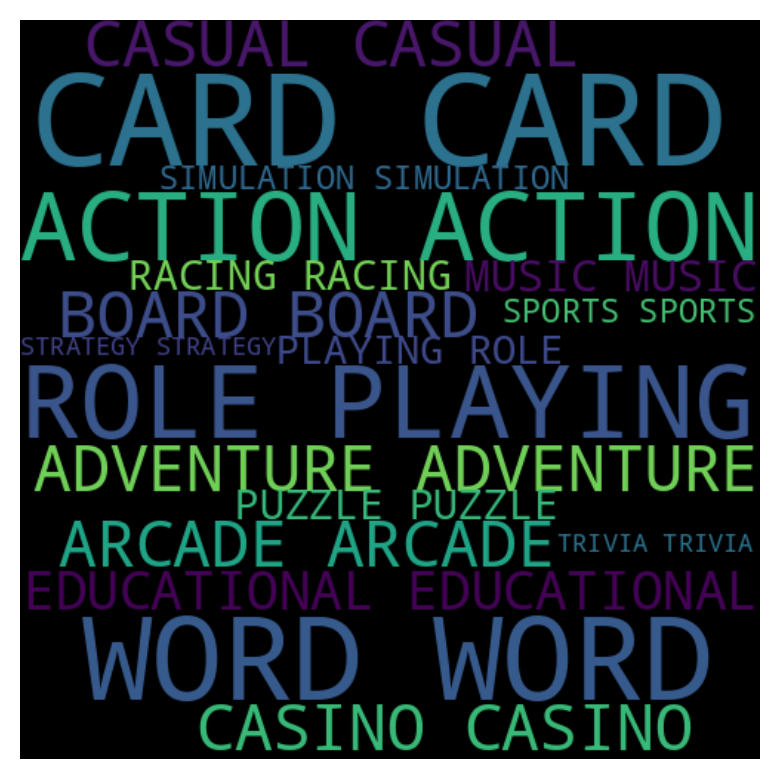

In [20]:
text = (''.join(category_list)).replace('GAME', '')

wordcloud = WordCloud(width=500, height=500, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Вывод:** на данном шаге были получены категории приложений. Наиболее вылеляются карточные игры и игры со словами.

## Шаг 2: Установки в категориях

Сгруппируем приложения по категориям и выведем статистику

In [26]:
grouped = df.groupby('category').sum()
grouped

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
category,,,,,,,,,,,,,,
GAME ACTION,5050,Garena Free Fire- World SeriesPUBG MOBILE - Tr...,401134360,7410.0,389,1880.8,11829.4,0.00,286793595,34300508,18980427,10774256,50285330,0
GAME ADVENTURE,5050,RobloxPokémon GOCriminal Case쿠키런 for KakaoHarr...,89356174,1803.0,385,25910.1,608.4,0.00,63005171,9905693,4993348,2425807,9025895,0
GAME ARCADE,5050,Subway SurfersHungry Shark Evolution - Offline...,179377991,7161.0,391,5892.4,2197.0,9.48,129602978,18547895,10020924,4846981,16358970,2
GAME BOARD,5050,Ludo King™Happy Color™ – Color by Number. Colo...,44574307,2123.0,393,3444.5,58789.1,0.00,31971539,4728307,2188196,1060357,4625663,0
GAME CARD,6164,Yu-Gi-Oh! Duel LinksHearthstoneSolitaireSolita...,41908116,2572.0,496,94071.4,69972.5,2.99,29881808,5906769,2121491,864741,3132998,1
GAME CASINO,5050,Zynga Poker™ – Free Texas Holdem Online Card G...,36190309,1271.0,395,233525.3,219.3,0.00,26809741,4035760,1824486,761365,2758706,0
GAME CASUAL,5050,Candy Crush SagaMy Talking TomMy Talking Angel...,247086604,6397.0,395,3602.0,1481.2,0.00,179271379,28382568,13310825,5999318,20122262,0
GAME EDUCATIONAL,5050,Toca Life World: Build stories & create your w...,15298035,2289.0,389,10245.5,1474.8,0.00,10859162,1449345,834675,507436,1647168,0
GAME MUSIC,5050,Tiles Hop: EDM Rush!Magic Tiles 3My Singing Mo...,21630202,2947.0,380,2462.6,2216.0,3.48,15057603,2180468,1286267,677903,2427712,2


Построим график

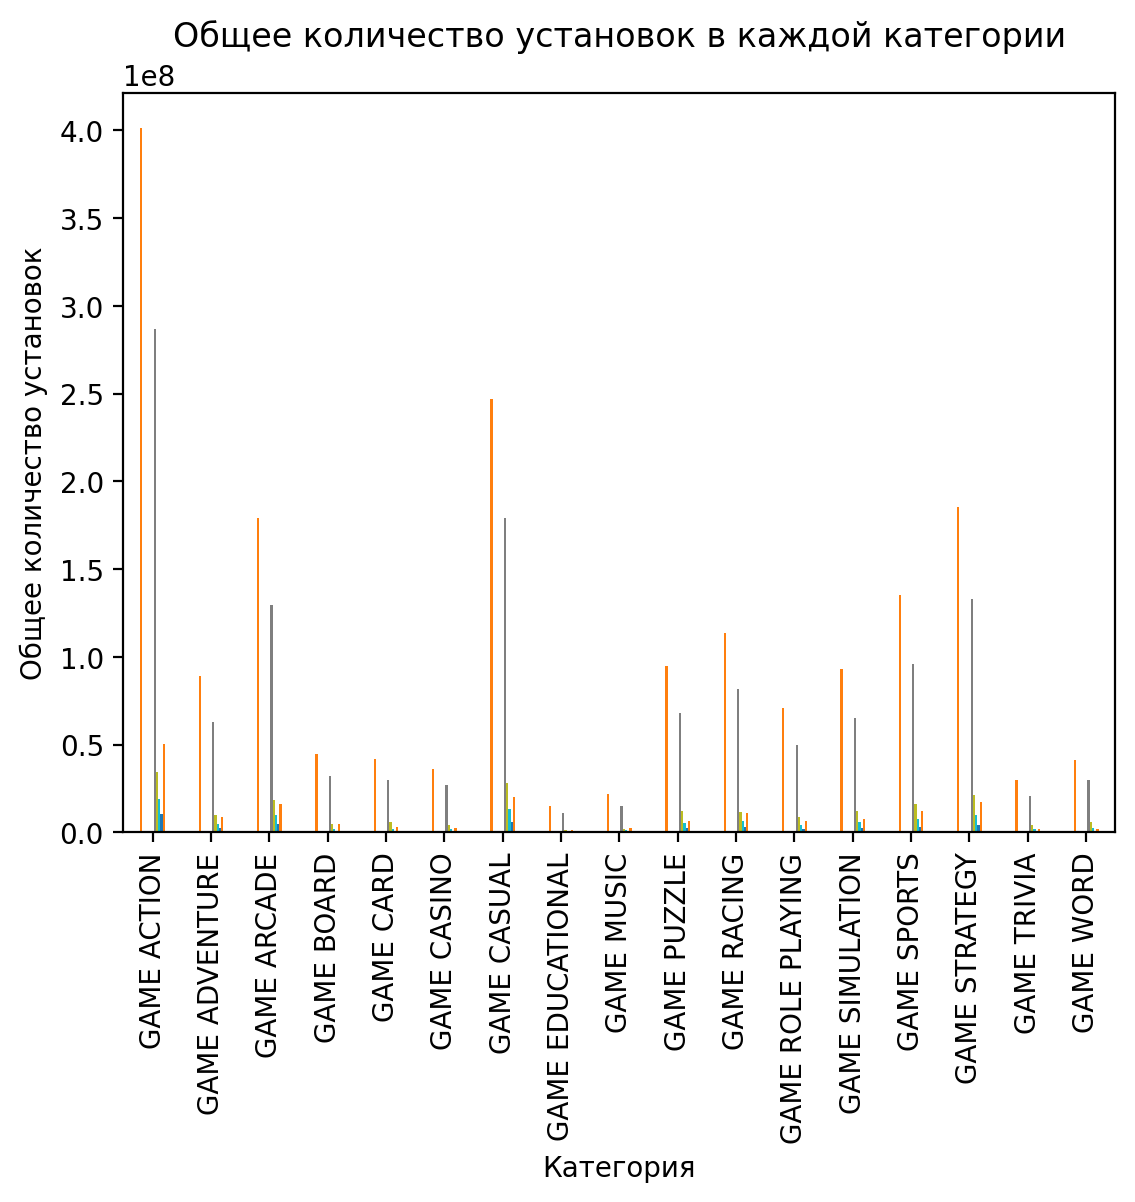

In [25]:
grouped.plot(kind='bar', legend=None)
plt.xlabel('Категория')
plt.ylabel('Общее количество установок')
plt.title('Общее количество установок в каждой категории')
plt.show()  # Lollipop plot

**Вывод:** Самыми загружаемыми играми является экшон. Меньше всего устанавоивают музыкальные и образовательные игры.

## Шаг 3: Сравнение приложений по цене

Из таблицы выше видно, что нет смысла сравнивать конкретные цены приложений, поэтому построим график платных и бесплатных. В данном случае - сравним 2 числа.

In [31]:
paid_count = 7
free_count = 1730 - 7

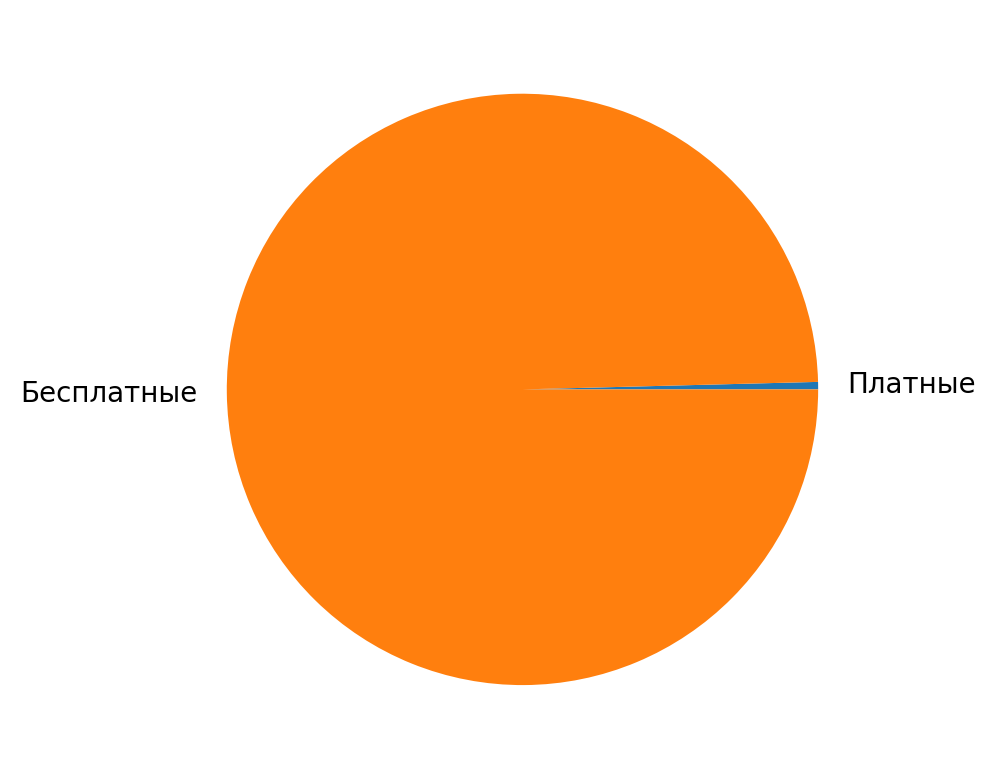

In [34]:
plt.pie([paid_count, free_count], labels=['Платные', 'Бесплатные'])
plt.show()

**Вывод:** Топ-игры в основном бесплатные

## Шаг 4. Влияние рейтинга на количество установок

Для этого графика особых преобразований не нужно. Всего одна строка кода...

<Axes: xlabel='average rating', ylabel='installs'>

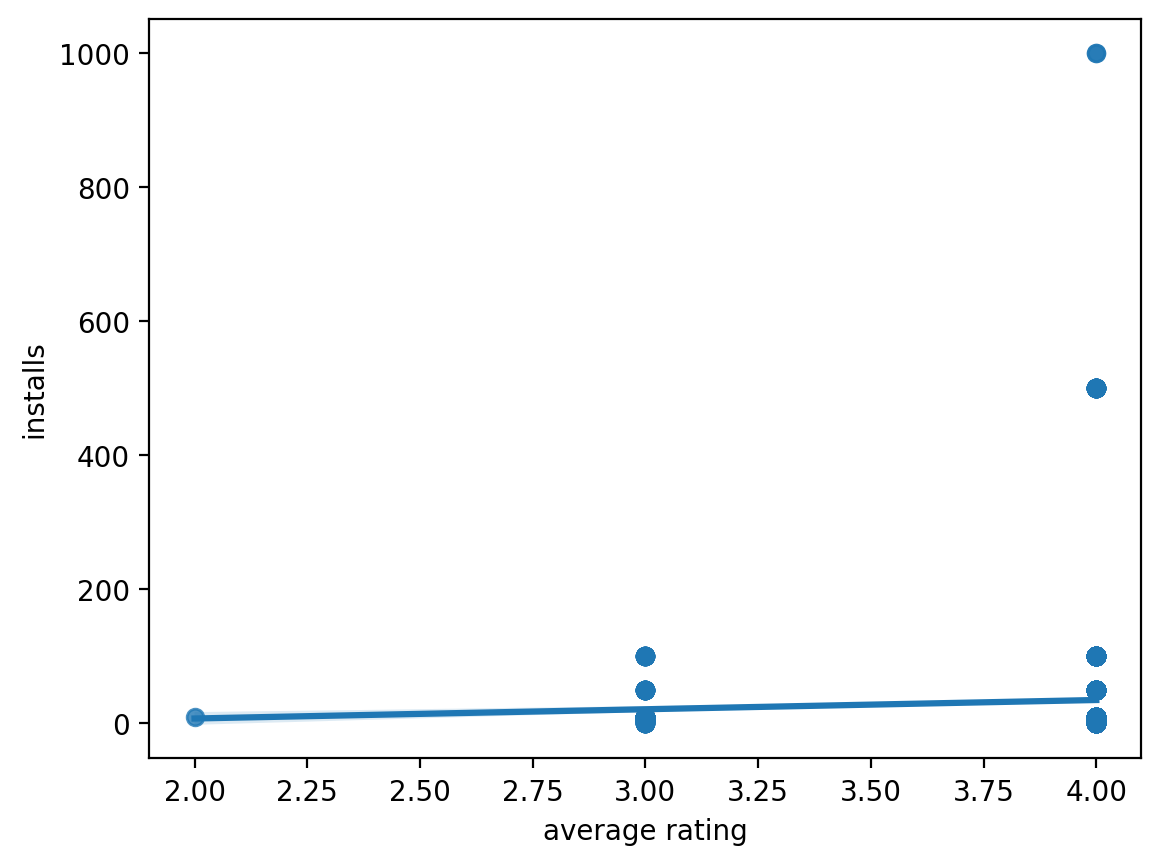

In [35]:
sns.regplot(x=df["average rating"], y=df["installs"])

**Вывод:** Приложения с низким рейтингом не устанавливают. Если рейтинг высокий, то это не означает, что игру много устанавливают

## Шаг 5. Влияние оценок одного туровня на другой

Оценим влияние количества рейтингов на более высокий/низкий показатель количества других рейтингов.

Оставим только колонки рейтингов

In [42]:
ratings = df[['5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings']]

Построим кореляцию

<Axes: >

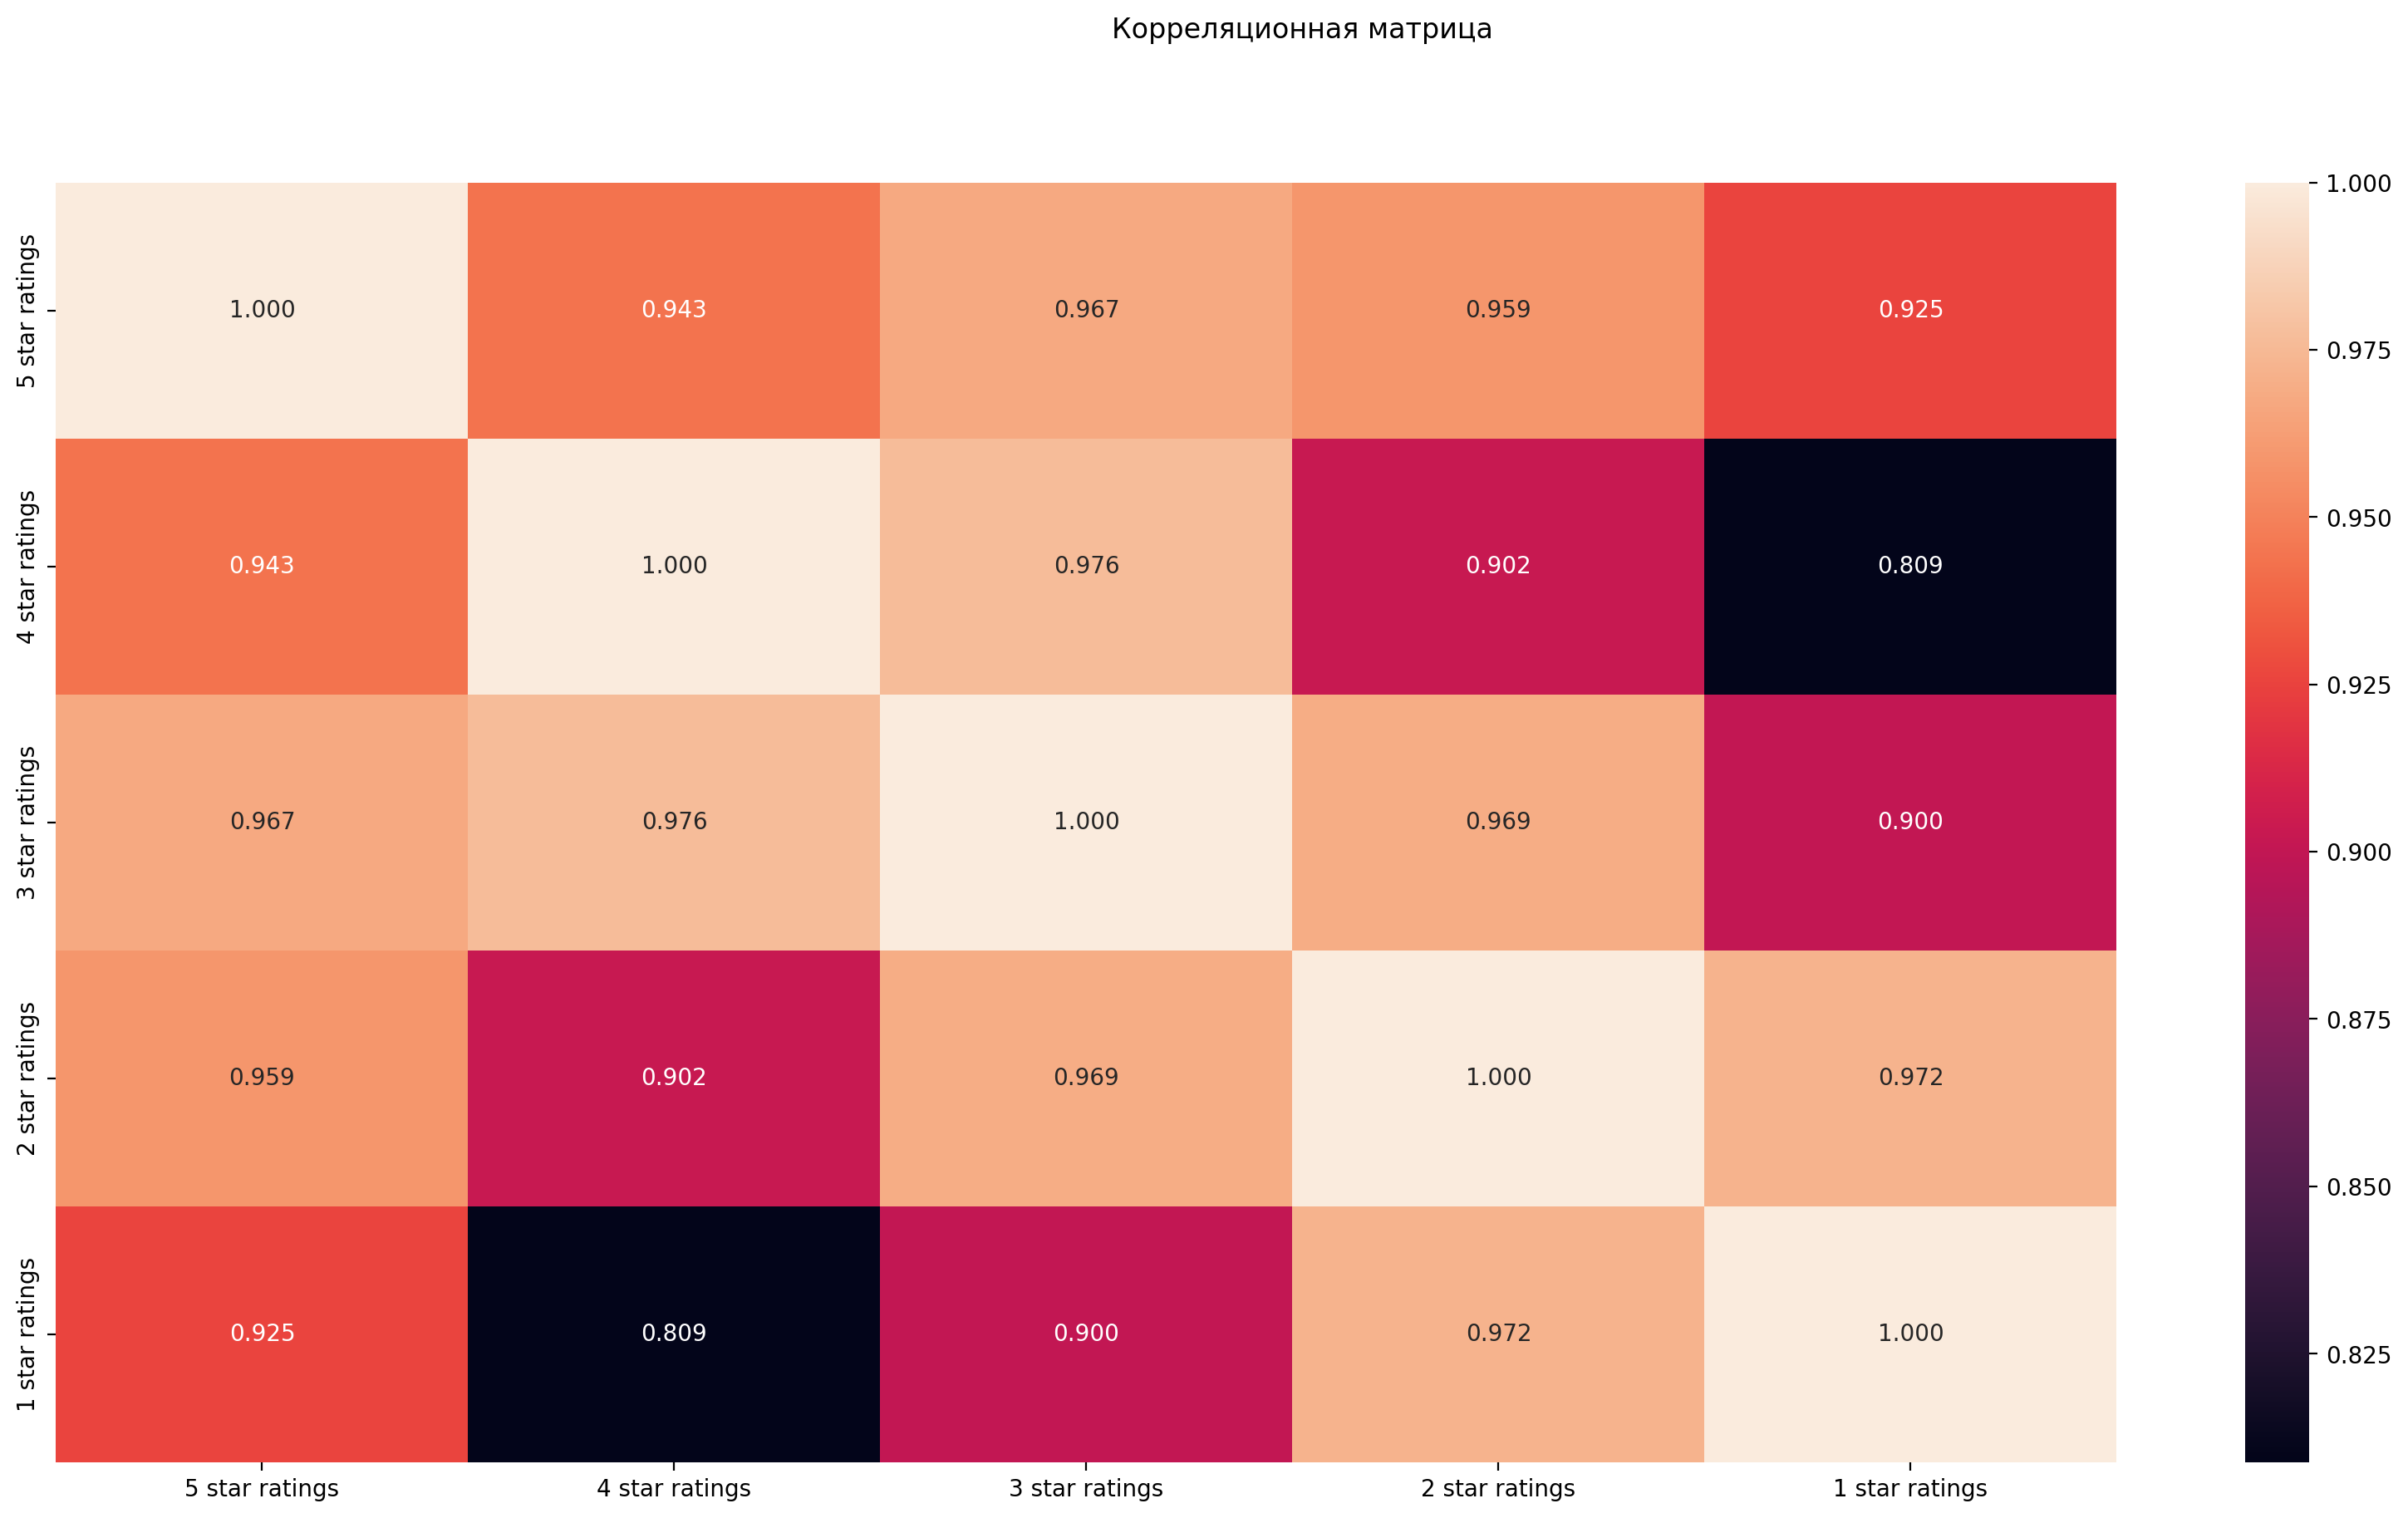

In [43]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(ratings.corr(), ax=ax, annot=True, fmt='.3f')

**Вывод:** Играм часто ставят оценки 5 вместе с 1 в похожих количествах